In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

In [2]:
plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
dense = defaultdict(lambda: 1e20)
sparse_coo = defaultdict(lambda: defaultdict(lambda: 1e20))
sparse_csr = defaultdict(lambda: defaultdict(lambda: 1e20))

In [4]:
for l in open("benches/results"):
    its = l.strip().split()
    if its[0] == 'sparse' and its[1] == 'coo':
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        nnz = int(its[5])
        timing = float(its[6])
        sparse_coo[(nl,bs,hs)][nnz] = min(timing, sparse_coo[(nl,bs,hs)][nnz])
    elif its[0] == 'sparse' and its[1] == 'csr':
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        nnz = int(its[5])
        timing = float(its[6])
        sparse_csr[(nl,bs,hs)][nnz] = min(timing, sparse_csr[(nl,bs,hs)][nnz])
    else:
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        timing = float(its[5])
        dense[(nl,bs,hs)] = min(timing, dense[(nl,bs,hs)])

In [26]:
cm = matplotlib.cm.get_cmap("hsv", lut=7)

In [27]:
bscols = {
    1: cm(0),
    4: cm(1),
    16: cm(2),
    64: cm(3),
    256: cm(4),
    1024: cm(5),
}

bscols

{1: (1.0, 0.0, 0.0, 1.0),
 4: (0.9843746718746719, 0.9687506562506563, 0.0, 1.0),
 16: (0.031249343749343732, 1.0, 1.3125013125390552e-06, 1.0),
 64: (0.0, 1.0, 0.9531223422015868, 1.0),
 256: (0.0, 0.062501968751969, 1.0, 1.0),
 1024: (0.9218740156240154, 0.0, 1.0, 1.0)}

64


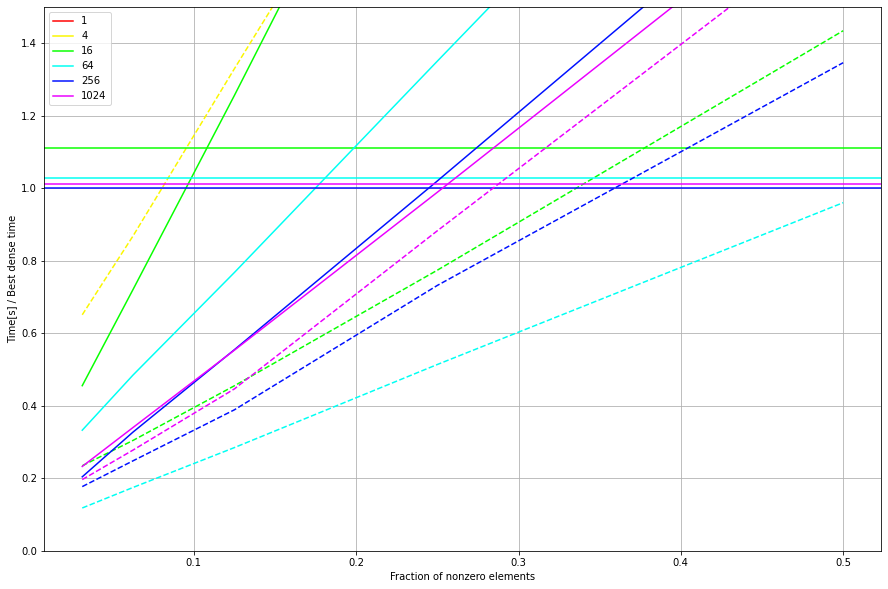

128


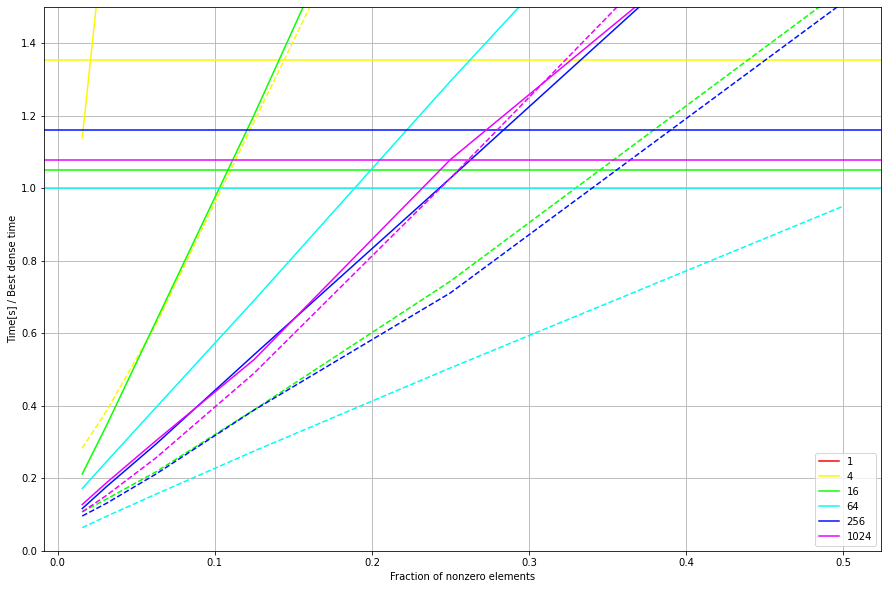

256


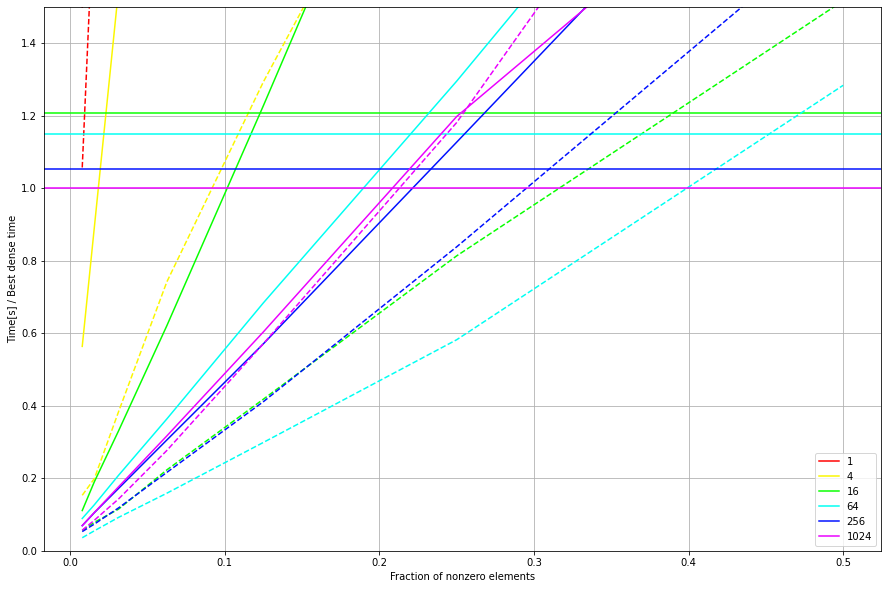

512


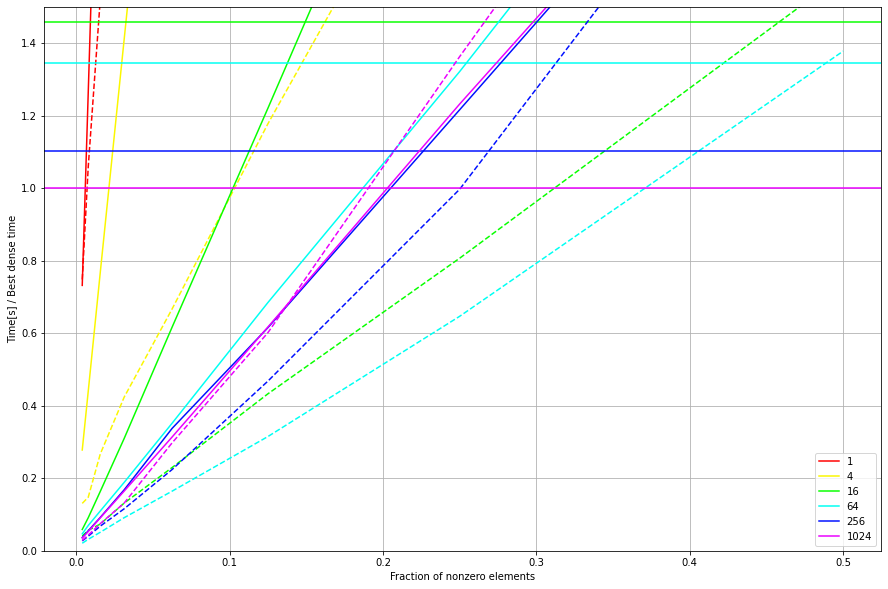

In [31]:
for hst in [64, 128, 256, 512]:
    best_dense = 1e12
    for k in dense:
    
        nl,bs,hs = k
        if nl != 6:
            continue
        if hs != hst:
            continue
            
        best_dense = min(best_dense, dense[k] / bs)
    
    
    print(hst)
    for k in dense:
    
        nl,bs,hs = k
        if nl != 6:
            continue
        if hs != hst:
            continue

        x = []
        y = []
        for nnz in sparse_coo[k]:
            sparsity = nnz / (hs*hs)
            x.append(sparsity)
            y.append(sparse_coo[k][nnz] / bs / best_dense)
            
        plt.plot(x, y, color=bscols[bs], alpha=1.0, label=str(bs))

        x = []
        y = []
        for nnz in sparse_csr[k]:
            sparsity = nnz / (hs*hs)
            x.append(sparsity)
            y.append(sparse_csr[k][nnz] / bs / best_dense) 
        plt.plot(x, y, color=bscols[bs], alpha=1.0, linestyle='--')
        
        plt.axhline(dense[k] / bs / best_dense, color=bscols[bs])
        #print(k)
        #print(x, y, dense[k])
        #break
    #plt.ylim(0, 2.0)
    plt.ylim(0, 1.5)
    plt.xlabel("Fraction of nonzero elements")
    plt.ylabel("Time[s] / Best dense time")
    plt.legend()
    plt.grid()
    plt.show()
    

No handles with labels found to put in legend.


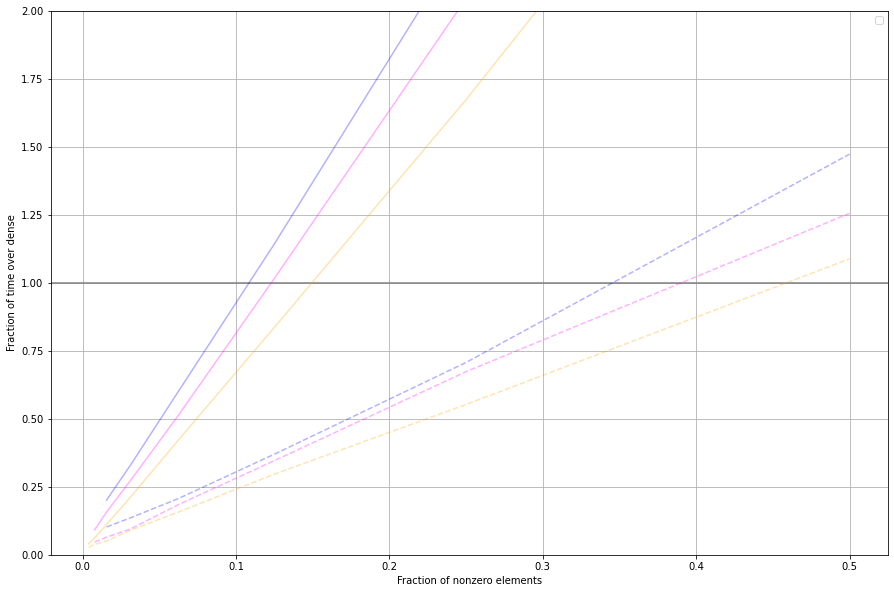

In [25]:
hscols = {
    32: "red",
    64: "green",
    128: "blue",
    256: "magenta",
    512: "orange"
}

plt.axhline(1, color="gray")

for k in dense:
    
    nl,bs,hs = k
    if nl != 6:
        continue
    if bs not in [16]:
        continue
    if hs not in [128, 256, 512]:
        continue
        
    
    
    x = []
    y = []
    for nnz in sparse_coo[k]:
        sparsity = nnz / (hs*hs)
        x.append(sparsity)
        y.append(sparse_coo[k][nnz] / dense[k])
    plt.plot(x, y, color=hscols[hs], alpha=0.3)
    
    x = []
    y = []
    for nnz in sparse_csr[k]:
        sparsity = nnz / (hs*hs)
        x.append(sparsity)
        y.append(sparse_csr[k][nnz] / dense[k])
    plt.plot(x, y, color=hscols[hs], alpha=0.3, linestyle='--')
    #print(k)
    #print(x, y, dense[k])
    #break
plt.ylim(0, 2.0)
plt.xlabel("Fraction of nonzero elements")
plt.ylabel("Fraction of time over dense")
plt.legend()
plt.grid()
